In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [34]:
# Download and load the data
import keras
import os

f_path_1 = "data/Euro_Salary.csv"
url_1 = "https://github.com/AkeemSemper/ml_data/raw/main/Euro_Salary.csv"
if not os.path.exists(f_path_1):
    file_1 = keras.utils.get_file(f_path_1, url_1)
df = pd.read_csv(f_path_1)

# Assignment 2 - Regression
### Predict the TOTAL COMPENSATION for this year. 

The data file provided is a salary survey for tech workers in Europe. We want to predict the total amount of compensation they bring in each year, based off of the details of their work. 

Some notes that will be important:
<ul>
    <li>The total compensation will need to be constructed, there is a column for salary, "Yearly brutto salary (without bonus and stocks) in EUR", as well as a column for bonus compensation, "Yearly bonus + stocks in EUR". 
    <li>Some categorical variables will need some work, and there isn't generally an exact answer. The main concern is things with categories that have a bunch of values with a very small count. For example, if there is only 1 person in City X, then that value likely needs to be addressed. We don't want it encoded into a new column of one 1 and thousands of 0s. 
    <li>There is an article exploring some of the data here: https://www.asdcode.de/2021/01/it-salary-survey-december-2020.html
    <li>Imputation and a bit of data manipulation will be required. 
    <li>Use any regression method you'd like. Some ones are closely related to what we've done, you may want to look at them, e.g. ExtraTreesRegressor. 
    <li>Initial accurracy, and potentially final accuracy, may not be great. When I made a plain model will little optimization the errors were large and the R2 was low. There is lots of room for optimization. 
    <li>Research challenge - try some work on the target, look into TransformedTargetRegressor and see if that helps. Recall in stats when we had skewed distributions... Maybe it helps, maybe it doesn't. 
    <li>EDA and data prep are up to you - you'll probably need to do a little exploring to figure out what cleanup is needed. When I did it, I did things kind of iteratively when I did it. For example, look at the value counts, figure out how to treat the different categories, clean something up, look at the results, potentially repeat if needed. After you figure out what needs to be done, you may be able to take some of those steps and incorporate them into a pipeline to be cleaner....
    <li><b>CRITICAL - Please make sure you publish it after having run it, all the output should be showing.</b>
</ul>

### Details and Deliverables

You'll need to build code to produce the predictions. In particular, there's a few things that'll be marked:
<ul>
    <li>Please add a "presentation version" at the bottom, where you show what you did, and the results. Basically, you start with the original data, you do some work to figure out what's needed, you try a few models and select the best. At the bottom, put what <i>you actually settled on</i>, i.e. after all the figuring and exploring, here's the code that goes from raw data to final results, and here's what the results were. I should be able to read this part and understand what you did clearly:
    <ul>
        <li> Please make a pipeline that does the prep work - you may need some exploration or several trials before settling on what exactly to use, that's normal. Once you've settled, build that into a pipeline so it's clear and repeatable.
        <li> What you settled on for data cleaning, along with what prompted it. 
        <li> Feature Selection - Please identify what you did for feature selection. No need for a long explaination, something along the lines of "I did X, and the result was that 4 features were removed". Try at least 2 things. 
        <li> Model selection - between selecting a model style and tuning it with hyperparameters, what did you test and what won?
        <li> Overall, how good was your model and what things may make sense to try to do even better? 
        <li> If you could use titles/bullet points I'd really appreciate it. 
    </ul>
    <li>Grade Breakdown:
    <ul>
        <li> Code is readable, there are comments: 20%
        <li> Explaination as defined above: 60% (20% each point)
        <li> Accuracy: 20% As compared to everyone else. This will be generously graded, I won't be surprised if overall accuracy is low for most people. 
    </ul>
</ul>

<b>The biggest challenge here is translating the data into something useful and clean. This will probably require a bit of exploration, examining the data, thinking about what it means, trying something, then making a model to see what the results are. In particular, think about what value some of the less clean bits of data my hold - binning/grouping, numerical transformations, outlier removal, etc... are all likely to be useful somewhere. You almost certainly need to look at it column by column and make a decision, I'll apologize up front, it isn't the most fun process in the world. There is not one specific correct answer.</b>

In [35]:
#Load Data
#df = pd.read_csv("data/Euro_Salary.csv")
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,1253,1248,24/11/2020 13:55:19,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1226.0,NaN,NaN,NaN,32.509788,5.663804,20.0,29.0,32.0,35.0,69.0
Gender,1243,3,Male,1049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1253,119,Berlin,681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,1247,148,Software Engineer,387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total years of experience,1237,48,10,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Years of experience in Germany,1221,53,2,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seniority level,1241,24,Senior,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Your main technology / programming language,1126,256,Java,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other technologies/programming languages you use often,1096,562,Javascript / Typescript,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df[393:396]

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
393,24/11/2020 19:15:02,30.0,Male,Moscow,Software Engineer,5,0,Middle,C,C/C++,14712.0,0,30,Full-time employee,Unlimited contract,Russian,101-1000,Product
394,24/11/2020 19:15:49,33.0,Male,Berlin,Product Manager,5,5,Senior,NaN,Python,70000.0,800,30,Full-time employee,NaN,German,101-1000,Product
395,24/11/2020 19:19:30,35.0,Male,Berlin,QA Engineer,11,10,Senior,Java,"Python, Javascript / Typescript, .NET, Java / ...",74400.0,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product


In [37]:
#df.info()
df["Other technologies/programming languages you use often"].value_counts()

Other technologies/programming languages you use often
Javascript / Typescript                                                                   44
Python                                                                                    37
SQL                                                                                       31
AWS, Docker                                                                               16
Kotlin                                                                                    15
                                                                                          ..
Python, Ruby, Java / Scala, Go, Rust, AWS, Kubernetes, Docker, Terraform, helm, packer     1
Kotlin, SQL, AWS, Kubernetes, Docker                                                       1
Python, R, Go                                                                              1
C/C++, PHP, SQL                                                                            1
Python, AWS, Ku

In [38]:
df.sample(20)

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
357,24/11/2020 18:10:54,26.0,Male,Karlsruhe,Software Engineer,5,5,NaN,NaN,"Python, Kotlin, Javascript / Typescript, Java ...",55000.0,0,30,Full-time employee,Unlimited contract,50/50,11-50,Consulting / Agency
844,27/11/2020 13:41:01,28.0,Male,Frankfurt,Mobile Developer,5,1,Senior,Swift,Swift,50000.0,0,24,Full-time employee,Unlimited contract,English,11-50,Consulting / Agency
694,25/11/2020 20:34:33,31.0,Female,Ulm,QA Engineer,8,3,Middle,Java,Java / Scala,45000.0,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product
616,25/11/2020 14:53:46,45.0,Female,Berlin,Product Manager,15,7,Lead,Java,NaN,52000.0,NaN,28,Full-time employee,Unlimited contract,English,11-50,Product
1075,03/12/2020 21:25:35,38.0,Male,Berlin,Backend Developer,15,1,Middle,PHP/MySQL,"PHP, SQL, Docker, VMs",40700.0,NaN,25,Full-time employee,Unlimited contract,English,11-50,Consulting / Agency
544,25/11/2020 11:37:31,29.0,Male,Milan,Data Scientist,4,0,Middle,Python + SQL,"Python, SQL, Spark",37500.0,0,16,Full-time employee,Unlimited contract,Italian,101-1000,Consulting / Agency
944,30/11/2020 12:11:34,30.0,Male,Barcelona,Data Scientist,5,0,Senior,R,"Python, SQL",40000.0,0,25,Full-time employee,Unlimited contract,Spanish,1000+,Consulting / Agency
45,24/11/2020 11:31:01,48.0,Male,Berlin,Software Engineer,25,11,Senior,Java,"Kotlin, Java / Scala, SQL",75000.0,NaN,28,Full-time employee,Unlimited contract,English,101-1000,Product
89,24/11/2020 11:46:21,29.0,Male,Berlin,DevOps,7,1,Lead,Kubernetes,"Python, Go, AWS, Kubernetes",78000.0,10000,28,Full-time employee,Unlimited contract,English,101-1000,Product
118,24/11/2020 11:57:55,28.0,Male,Cologne,BI Consultant,8,1,Senior,SQL,"Python, Javascript / Typescript",60000.0,12000,28,Full-time employee,Unlimited contract,English,up to 10,Consulting / Agency


### Data cleaning

In [39]:
df_clean = df.copy()

In [40]:
# Drop Columns with No Predictive Value and Columns with Too Many Missing Values
df_clean = df_clean.drop(columns=["Timestamp"])

In [41]:
# Handle bonus column with missing values by filling them with 0
df_clean["Yearly bonus + stocks in EUR"] = (df_clean["Yearly bonus + stocks in EUR"].fillna(0))

In [42]:
# Cap salary at the 99th percentile to remove outliers

salary_col = "Yearly brutto salary (without bonus and stocks) in EUR"

salary_cap = df_clean[salary_col].quantile(0.99)

df_clean = df_clean[df_clean[salary_col] <= salary_cap]


In [43]:
# Convert salary and bonus columns to numeric, coercing errors to NaN
salary_col = "Yearly brutto salary (without bonus and stocks) in EUR"
bonus_col = "Yearly bonus + stocks in EUR"

df_clean[salary_col] = pd.to_numeric(df_clean[salary_col], errors="coerce")

df_clean[bonus_col] = pd.to_numeric(df_clean[bonus_col], errors="coerce")


In [44]:
# Fill any remaining NaN values in the bonus column with 0
df_clean[bonus_col] = df_clean[bonus_col].fillna(0)

# Outlier capping
salary_cap = df_clean[salary_col].quantile(0.99)

df_clean = df_clean[df_clean[salary_col] <= salary_cap]

# Create a new column for total compensation
df_clean["Total Compensation"] = (df_clean[salary_col] + df_clean[bonus_col])

df_clean[[salary_col, bonus_col, "Total Compensation"]].dtypes



Yearly brutto salary (without bonus and stocks) in EUR    float64
Yearly bonus + stocks in EUR                              float64
Total Compensation                                        float64
dtype: object

In [45]:
df_clean["Total Compensation"].describe()

count    1.227000e+03
mean     8.203579e+04
std      4.889778e+04
min      1.000100e+04
25%      6.000000e+04
50%      7.250000e+04
75%      9.000000e+04
max      1.240000e+06
Name: Total Compensation, dtype: float64

In [46]:
# Clean obvious numeric columns
df_clean["Age"] = df_clean["Age"].fillna(df_clean["Age"].median())


In [47]:
# convert experience columns to numeric
exp_total_col = "Total years of experience"
exp_de_col = "Years of experience in Germany"

df_clean[exp_total_col] = pd.to_numeric(df_clean[exp_total_col], errors="coerce")

df_clean[exp_de_col] = pd.to_numeric(df_clean[exp_de_col], errors="coerce")

# Impute missing values
df_clean[exp_total_col] = df_clean[exp_total_col].fillna(df_clean[exp_total_col].median())

df_clean[exp_de_col] = df_clean[exp_de_col].fillna(0)

# Check for any remaining non-numeric values in experience columns
df.loc[~df[exp_total_col].astype(str).str.match(r"^\d+(\.\d+)?$", na=False), exp_total_col].value_counts().head(10)



Total years of experience
1,5                                                    2
1 (as QA Engineer) / 11 in total                       1
2,5                                                    1
15, thereof 8 as CTO                                   1
6 (not as a data scientist, but as a lab scientist)    1
less than year                                         1
Name: count, dtype: int64

In [48]:
for col in df_clean.columns:
    print(repr(col))


'Age'
'Gender'
'City'
'Position '
'Total years of experience'
'Years of experience in Germany'
'Seniority level'
'Your main technology / programming language'
'Other technologies/programming languages you use often'
'Yearly brutto salary (without bonus and stocks) in EUR'
'Yearly bonus + stocks in EUR'
'Number of vacation days'
'Employment status'
'Сontract duration'
'Main language at work'
'Company size'
'Company type'
'Total Compensation'


In [49]:

exp_total_col = "Total years of experience"
exp_de_col = "Years of experience in Germany"

# Convert to numeric 
df_clean[exp_total_col] = pd.to_numeric(df_clean[exp_total_col], errors="coerce")

df_clean[exp_de_col] = pd.to_numeric(df_clean[exp_de_col], errors="coerce")

# Handle missing values in experience columns
df_clean[exp_total_col] = df_clean[exp_total_col].fillna(df_clean[exp_total_col].median())

df_clean[exp_de_col] = df_clean[exp_de_col].fillna(0)


In [50]:
# Check the cleaned data
df_clean[["Total Compensation", "Age", "Total years of experience", "Years of experience in Germany"]].describe()


,Total Compensation,Age,Total years of experience,Years of experience in Germany
count,1.227000e+03,1227.000000,1227.000000,1227.000000
mean,8.203579e+04,32.482478,9.019641,3.548492
std,4.889778e+04,5.591620,11.882728,3.613648
min,1.000100e+04,21.000000,0.000000,0.000000
25%,6.000000e+04,29.000000,5.000000,1.000000
50%,7.250000e+04,32.000000,8.000000,3.000000
75%,9.000000e+04,35.000000,12.000000,5.000000
max,1.240000e+06,69.000000,383.000000,30.000000


In [51]:
df_clean.isna().sum().sort_values(ascending=False)

Other technologies/programming languages you use often    152
Your main technology / programming language               125
Number of vacation days                                    65
Сontract duration                                          25
Company type                                               23
Employment status                                          16
Company size                                               16
Main language at work                                      15
Seniority level                                            11
Gender                                                      9
Position                                                    5
Age                                                         0
Yearly brutto salary (without bonus and stocks) in EUR      0
Yearly bonus + stocks in EUR                                0
Years of experience in Germany                              0
Total years of experience                                   0
City    

In [52]:
df_clean.shape


(1227, 18)

### Build a baseline pipeline

In [53]:
!pip install feature-engine



In [56]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class RareCategoryGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, min_count=10):
        self.min_count = min_count
        self.keep_values_ = {}

    def fit(self, X, y=None):
        X = pd.DataFrame(X).copy()
        for col in X.columns:
            vc = X[col].astype("string").fillna("Missing").value_counts()
            self.keep_values_[col] = set(vc[vc >= self.min_count].index)
        return self

    def transform(self, X):
        X = pd.DataFrame(X).copy()
        for col in X.columns:
            s = X[col].astype("string").fillna("Missing")
            X[col] = s.where(s.isin(self.keep_values_[col]), other="Other")
        return X


In [60]:
from sklearn.impute import SimpleImputer
from feature_engine.encoding import RareLabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer



salary_col = "Yearly brutto salary (without bonus and stocks) in EUR"
bonus_col  = "Yearly bonus + stocks in EUR"
target = "Total Compensation"

# Define X,y WITHOUT leakage
X = df_clean.drop(columns=[target, salary_col, bonus_col])
y = df_clean[target]

# Make sure leakage columns are gone
assert salary_col not in X.columns and bonus_col not in X.columns, "Leakage columns still in X!"

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Recompute feature lists
numeric_features = X_train.select_dtypes(include=["number"]).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=["number"]).columns.tolist()

# Rebuild preprocess + baseline pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())])

categorical_transformer = Pipeline(steps=[
    ("rare", RareCategoryGrouper(min_count=10)),
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="drop")

baseline_pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("model", Ridge(alpha=1.0))])


In [61]:
rmse_cv = -cross_val_score(
    baseline_pipe, X_train, y_train,
    scoring="neg_root_mean_squared_error", cv=5
).mean()

r2_cv = cross_val_score(
    baseline_pipe, X_train, y_train,
    scoring="r2", cv=5
).mean()

rmse_cv, r2_cv


(np.float64(45237.17943533561), np.float64(-0.05292825610331013))

### Feature Selection/Tuning

In [62]:
from sklearn.ensemble import ExtraTreesRegressor

etr_pipe = Pipeline(steps=[("prep", preprocess), ("model", ExtraTreesRegressor(n_estimators=600,random_state=42,n_jobs=-1))])

etr_rmse = -cross_val_score(etr_pipe, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5).mean()
etr_r2 = cross_val_score(etr_pipe, X_train, y_train, scoring="r2", cv=5).mean()

etr_rmse, etr_r2


(np.float64(67326.12157463178), np.float64(-2.5767191661883766))

In [63]:
from sklearn.ensemble import RandomForestRegressor

rf_pipe = Pipeline(steps=[("prep", preprocess), ("model", RandomForestRegressor(n_estimators=600, random_state=42, n_jobs=-1))])

rf_rmse = -cross_val_score(rf_pipe, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5).mean()
rf_r2 = cross_val_score(rf_pipe, X_train, y_train, scoring="r2", cv=5).mean()

rf_rmse, rf_r2


(np.float64(43044.17099367181), np.float64(0.057182846478536865))

In [64]:
from sklearn.linear_model import SGDRegressor

sgd_pipe = Pipeline(steps=[("prep", preprocess), ("model", SGDRegressor(random_state=42))])

sgd_rmse = -cross_val_score(sgd_pipe, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5).mean()
sgd_r2 = cross_val_score(sgd_pipe, X_train, y_train, scoring="r2", cv=5).mean()

sgd_rmse, sgd_r2


(np.float64(43948.65168606884), np.float64(0.02258595991109793))

### Feature Selection

In [ ]:
# 
from sklearn.linear_model import Lasso

alphas = [0.001, 0.01, 0.1, 1.0] 

for a in alphas:
    lasso_pipe = Pipeline(steps=[("prep", preprocess), ("model", Lasso(alpha=a, max_iter=200000, tol=1e-3, random_state=42))])
    rmse = -cross_val_score(lasso_pipe, X_train, y_train,scoring="neg_root_mean_squared_error", cv=5).mean()
    r2 = cross_val_score(lasso_pipe, X_train, y_train, scoring="r2", cv=5).mean()
    print(f"alpha={a:<6} RMSE={rmse:,.0f}  R2={r2:.3f}")




c:\Users\dohal\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183574470792.8993, tolerance: 2301485472.289932
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\dohal\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111771848168.71802, tolerance: 2303408406.020155
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\dohal\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56620753998.66443, tolerance: 851153566.8904204
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\dohal\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:

alpha=0.001  RMSE=45,797  R2=-0.086
alpha=0.01   RMSE=45,797  R2=-0.086
alpha=0.1    RMSE=45,795  R2=-0.086
alpha=1.0    RMSE=45,773  R2=-0.085


In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_l1_pipe = Pipeline(steps=[("prep", preprocess), ("model", SGDRegressor(penalty="l1",alpha=1e-5,max_iter=5000,tol=1e-3,random_state=42))])

rmse = -cross_val_score(sgd_l1_pipe, X_train, y_train,scoring="neg_root_mean_squared_error", cv=5).mean()
r2 = cross_val_score(sgd_l1_pipe, X_train, y_train, scoring="r2", cv=5).mean()

rmse, r2


(np.float64(43958.50233563429), np.float64(0.02200336992283234))

### Tuning

In [ ]:
df_clean.columns = df_clean.columns.str.strip()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf_pipe = Pipeline(steps=[("prep", preprocess),("model", RandomForestRegressor(random_state=42, n_jobs=-1))])

param_grid = {"model__n_estimators": [400, 800],"model__max_depth": [None, 20, 40],"model__min_samples_leaf": [1, 3, 5],
              "model__max_features": ["sqrt", 0.5, 1.0]}

gs_rf = GridSearchCV(rf_pipe, param_grid=param_grid, scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1)

gs_rf.fit(X_train, y_train)

print("Best CV RMSE:", -gs_rf.best_score_)
print("Best params:", gs_rf.best_params_)


Best CV RMSE: 40710.08548006584
Best params: {'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__n_estimators': 800}


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

best_rf = gs_rf.best_estimator_
pred = best_rf.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, pred))
r2_test = r2_score(y_test, pred)

rmse_test, r2_test


(np.float64(37388.43932377192), 0.20043482674103985)

In [ ]:
from sklearn.inspection import permutation_importance

best_rf.fit(X_train, y_train)

perm = permutation_importance(
    best_rf, X_test, y_test,
    n_repeats=10, random_state=42,
    scoring="neg_root_mean_squared_error"
)

prep_fitted = best_rf.named_steps["prep"]
ohe = prep_fitted.named_transformers_["cat"].named_steps["onehot"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numeric_features, cat_feature_names])

importances = perm.importances_mean
sorted_idx = np.argsort(importances)[::-1]

top10 = pd.DataFrame({
    "feature": all_feature_names[sorted_idx[:10]],
    "importance (RMSE increase)": importances[sorted_idx[:10]]
})
top10

,feature,importance (RMSE increase)
0,City_Berlin,2044.498992
1,Gender_Other,1156.672151
2,Position _Backend Developer,786.950895
3,Total years of experience,481.646431
4,City_Stuttgart,419.797768
5,Gender_Female,261.003509
6,Gender_Male,228.056901
7,Years of experience in Germany,221.677183
8,City_Frankfurt,115.294098
9,City_Other,87.612373


In [ ]:
from sklearn.compose import TransformedTargetRegressor
import numpy as np
from sklearn.preprocessing import FunctionTransformer

# Use the tuned RF settings inside TTR
rf_tuned = RandomForestRegressor(
    random_state=42,
    n_jobs=-1,
    max_depth=20,
    max_features="sqrt",
    min_samples_leaf=1,
    n_estimators=800
)

ttr = TransformedTargetRegressor(
    regressor=rf_tuned,
    func=np.log1p,
    inverse_func=np.expm1
)

ttr_pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("model", ttr)
])

ttr_rmse_cv = -cross_val_score(
    ttr_pipe, X_train, y_train,
    scoring="neg_root_mean_squared_error", cv=5
).mean()

ttr_r2_cv = cross_val_score(ttr_pipe, X_train, y_train, scoring="r2", cv=5).mean()

ttr_rmse_cv, ttr_r2_cv

(np.float64(40551.84610392562), np.float64(0.21550094231086092))

In [ ]:
# Final evaluation on test set
ttr_pipe.fit(X_train, y_train)
pred_ttr = ttr_pipe.predict(X_test)

rmse_test_ttr = np.sqrt(mean_squared_error(y_test, pred_ttr))
r2_test_ttr = r2_score(y_test, pred_ttr)

rmse_test_ttr, r2_test_ttr


(np.float64(37888.075712541126), 0.17892223374404714)

### Model comparison

In [ ]:
best_rf = gs_rf.best_estimator_

cv_r2_tuned_rf = cross_val_score(
    best_rf, X_train, y_train, scoring="r2", cv=5
).mean()

cv_rmse_tuned_rf = -cross_val_score(
    best_rf, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5
).mean()

cv_rmse_tuned_rf, cv_r2_tuned_rf


(np.float64(40710.08548006584), np.float64(0.20340920718931205))

In [ ]:
results = pd.DataFrame([
    {"Model": "Ridge (baseline, no leakage)",
     "CV_RMSE": 45237.18,
     "CV_R2": -0.0529,
     "Test_RMSE": np.nan,
     "Test_R2": np.nan},

    {"Model": "RandomForest (baseline)",
     "CV_RMSE": 43958.50,
     "CV_R2": 0.0220,
     "Test_RMSE": np.nan,
     "Test_R2": np.nan},

    {"Model": "RandomForest (tuned)",
     "CV_RMSE": 40710.08548006584,
     "CV_R2": 0.20340920718931205,
     "Test_RMSE": 37388.44,
     "Test_R2": 0.2004},

    {"Model": "RF tuned + log-target (TTR)",
     "CV_RMSE": 40551.85,
     "CV_R2": 0.2155,
     "Test_RMSE": 37888.08,
     "Test_R2": 0.1789},
])

results



,Model,CV_RMSE,CV_R2,Test_RMSE,Test_R2
0,"Ridge (baseline, no leakage)",45237.18000,-0.052900,NaN,NaN
1,RandomForest (baseline),43958.50000,0.022000,NaN,NaN
2,RandomForest (tuned),40710.08548,0.203409,37388.44,0.2004
3,RF tuned + log-target (TTR),40551.85000,0.215500,37888.08,0.1789


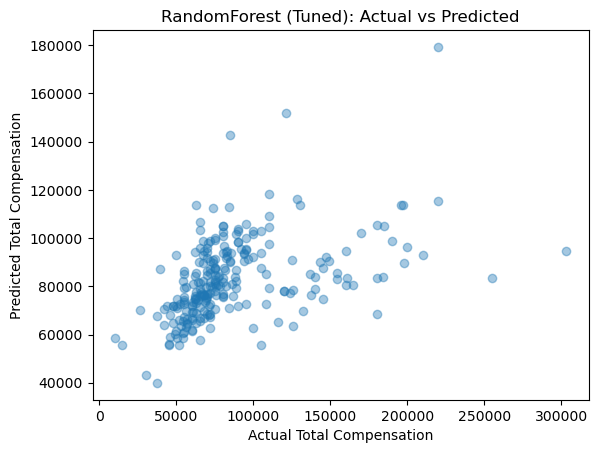

In [ ]:
import matplotlib.pyplot as plt

best_rf = gs_rf.best_estimator_

pred = best_rf.predict(X_test)

plt.figure()
plt.scatter(y_test, pred, alpha=0.4)
plt.xlabel("Actual Total Compensation")
plt.ylabel("Predicted Total Compensation")
plt.title("RandomForest (Tuned): Actual vs Predicted")
plt.show()


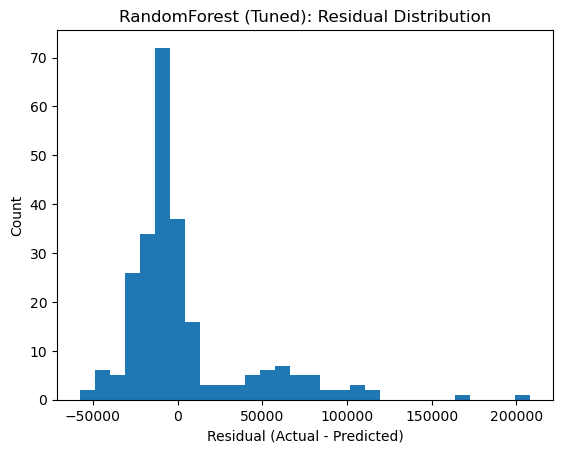

In [ ]:
residuals = y_test - pred

plt.figure()
plt.hist(residuals, bins=30)
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Count")
plt.title("RandomForest (Tuned): Residual Distribution")
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse_test = np.sqrt(mean_squared_error(y_test, pred))
r2_test = r2_score(y_test, pred)

print("FINAL MODEL: RandomForest (tuned)")
print("Best params:", gs_rf.best_params_)
print(f"Test RMSE: {rmse_test:,.2f}")
print(f"Test R2:   {r2_test:.3f}")


FINAL MODEL: RandomForest (tuned)
Best params: {'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__n_estimators': 800}
Test RMSE: 37,388.44
Test R2:   0.200


# Answers and Explainations
(Expand/modify as needed)

### Here's the Data Cleaning Steps I Used
Constructed the target variable
Created Total Compensation 

Prevented target leakage:
After constructing the target, both salary and bonus columns were removed from the feature set to prevent the model from directly using components of the target.

Converted numeric columns safely:
Salary, bonus, and experience columns were initially stored as object types due to inconsistent survey input. These were converted to numeric using coercion, and invalid entries were treated as missing values.

Handled missing values

Median imputation was used for core numeric fields (e.g., age, total years of experience).

Bonus values were filled with 0 where missing, assuming no additional compensation reported.

Experience in Germany was set to 0 when missing.

Handled extreme outliers:
Extremely large placeholder salary values were removed or capped to prevent distortion of model training.

Reduced high-cardinality sparse text fields: 
The “Other technologies/programming languages you use often” column contained hundreds of mostly unique values. It was simplified to a binary indicator (Has other technologies) to retain signal without introducing excessive sparsity.

Categorical preprocessing inside pipeline
Rare categories were grouped using a minimum frequency threshold before one-hot encoding, preventing the creation of many low-frequency dummy variables.

### Here's my Tuning/Feature Selection Steps
Ridge Regression was used as a baseline linear model, but after removing target leakage it performed poorly (negative R2), indicating that the relationship is not purely linear. Lasso was tested with multiple alpha values to perform embedded feature selection, but performance did not improve and convergence warnings occurred due to the high-dimensional sparse feature space after one-hot encoding. This suggested that linear shrinkage methods were not well suited for this dataset. Tree-based models were then tested because they handle non-linear relationships and interactions effectively. Among these, RandomForest performed best.

Two feature selection approaches were applied. First, Lasso was used as an embedded selection method to shrink weak coefficients, but it did not improve predictive performance. Second, permutation importance was applied to the tuned RandomForest model to identify influential predictors. The most impactful features included City (e.g., Berlin), Position (e.g., Backend Developer), and experience-related variables, confirming that location and experience were key drivers of compensation.

The RandomForest model was tuned using GridSearchCV over n_estimators, max_depth, min_samples_leaf, and max_features. Hyperparameter tuning significantly improved performance compared to the baseline RandomForest model. As part of the research challenge, a log-transformed target was tested using TransformedTargetRegressor to address skewness. Although cross-validation metrics slightly improved, the transformed model did not outperform the tuned RandomForest on the test set, so the original-scale RandomForest was selected as the final model.

### Here's my Model's Performance
The tuned RandomForest clearly outperformed the linear models, demonstrating that compensation depends on non-linear interactions among features such as City, Position, and experience. Diagnostic plots showed that predictions follow the general upward trend of actual compensation, though the model tends to underestimate very high salaries. Residuals were centered near zero but exhibited a right tail, confirming difficulty in modeling extreme compensation values.

### Here's my Final Conclusion on What Worked Best
The tuned RandomForest model performed best overall and was selected as the final model. It achieved the lowest test RMSE and the highest test R2 among all models evaluated. This indicates that tree-based methods are better suited for this dataset than linear models, likely because compensation depends on non-linear relationships and interactions between categorical and numeric features.

Linear models such as Ridge and Lasso struggled after removing target leakage, suggesting that compensation cannot be well approximated by a simple linear combination of features. The log-transformed target slightly improved cross-validation metrics but did not outperform the tuned RandomForest on the test set, so it was not selected as the final model.